# Example 7: Network Color Depiction (WORK IN PROGRESS: Loop over multiple SIR 3S calculations)

This example demonstrates how to ...

# SIR 3S Installation

In [1]:
SIR3S_SIRGRAF_DIR = r"C:\3S\SIR 3S\SirGraf-90-15-00-20x64_Quebec-Upd1" #change to local path

# Imports

In [2]:
from sir3stoolkit.core import wrapper

In [3]:
from sir3stoolkit.mantle import mantle

The wrapper package has to be initialized with reference to a SIR 3S (SirGraf) installation.

In [4]:
wrapper.Initialize_Toolkit(SIR3S_SIRGRAF_DIR)

## Additional imports

In [5]:
import os

...

# Initialization

In [6]:
s3s = mantle.Mantle_SIR3S_Model()

Initialization complete


# Open Model

In [7]:
dbFilePath=r"C:\Users\aUsername\3S\PT3S\PT3S\Examples\Example5.db3"

In [8]:
s3s.OpenModel(dbName=dbFilePath,
              providerType=s3s.ProviderTypes.SQLite,
              Mid="M-1-0-1",
              saveCurrentlyOpenModel=False,
              namedInstance="",
              userID="",
              password="")

Model is open for further operation


# View network graph

In [9]:
import networkx as nx

In [10]:
import matplotlib.pyplot as plt

In [11]:
G = s3s.SIR_3S_to_nx_graph()

[2025-12-04 15:22:18,098] INFO in sir3stoolkit.mantle.alternative_models: [graph] Building nx graph...
[2025-12-04 15:22:18,099] INFO in sir3stoolkit.mantle.dataframes: [metadata] Generating metadata dataframe for element type: ObjectTypes.Node
[2025-12-04 15:22:18,108] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieved 1559 element(s) of element type ObjectTypes.Node.
[2025-12-04 15:22:18,112] INFO in sir3stoolkit.mantle.dataframes: [Resolving tks] Retrieved 1559 element(s) of element type ObjectTypes.Node.
[2025-12-04 15:22:18,129] INFO in sir3stoolkit.mantle.dataframes: [Resolving Metadata Properties] Using 1 metadata properties.
[2025-12-04 15:22:18,130] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieving metadata properties ['Fkcont'], geometry...
[2025-12-04 15:22:18,337] WARNING in sir3stoolkit.mantle.dataframes: [metadata] Spatial Reference Identifier (SRID) not defined in model. DataFrame cannot be transformed to GeoDataFrame but geometry column can be crea

In [12]:
def plot_nx_graph(G, main_container):
    # Extract node positions from geometry and filter by Fkcont
    pos = {
        node_id: (data['geometry'].x, data['geometry'].y)
        for node_id, data in G.nodes(data=True)
        if 'geometry' in data and hasattr(data['geometry'], 'x') and hasattr(data['geometry'], 'y')
        and data.get('Fkcont') == main_container
    }

    # Extract edges with valid geometry and both nodes in pos
    edges = [
        (u, v, data) for u, v, data in G.edges(data=True)
        if u in pos and v in pos and 'geometry' in data and data['geometry'].geom_type != 'Point'
    ]

    # Plot
    plt.figure(figsize=(20, 14))
    for _, _, data in edges:
        geom = data['geometry']
        x, y = geom.xy
        plt.plot(x, y, color='black', linewidth=1)

    # Only draw nodes that have positions
    nx.draw_networkx_nodes(G, pos=pos, nodelist=list(pos.keys()), node_color='black', node_size=10)
    plt.title(f"nx-Graph")
    plt.axis('equal')
    plt.show()

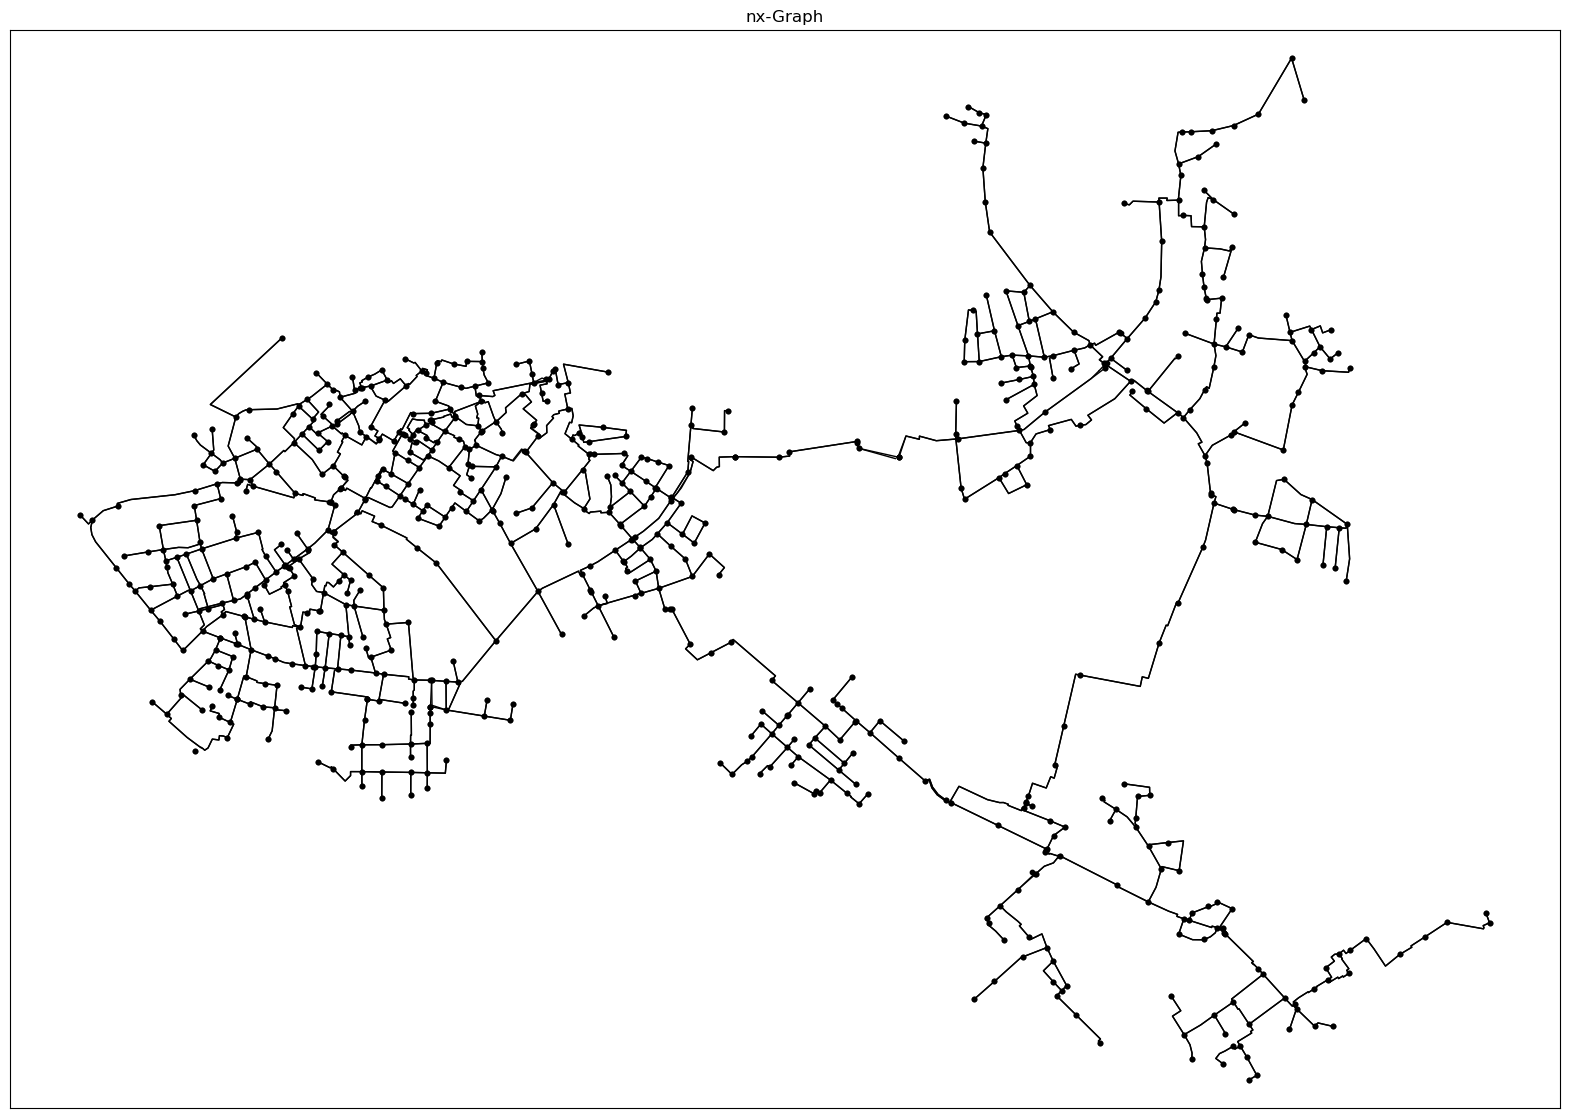

In [13]:
plot_nx_graph(G, s3s.GetMainContainer()[0])

# Prep Data

## District Heating consumers

In [14]:
gdf_district_heating_consumer_metadata = s3s.generate_element_metadata_dataframe(s3s.ObjectTypes.DistrictHeatingConsumer
                                                                        ,properties=[]
                                                                        ,geometry=True)

[2025-12-04 15:22:21,931] INFO in sir3stoolkit.mantle.dataframes: [metadata] Generating metadata dataframe for element type: ObjectTypes.DistrictHeatingConsumer
[2025-12-04 15:22:21,935] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieved 656 element(s) of element type ObjectTypes.DistrictHeatingConsumer.
[2025-12-04 15:22:21,937] INFO in sir3stoolkit.mantle.dataframes: [Resolving tks] Retrieved 656 element(s) of element type ObjectTypes.DistrictHeatingConsumer.
[2025-12-04 15:22:21,939] INFO in sir3stoolkit.mantle.dataframes: [Resolving Metadata Properties] Using 0 metadata properties.
[2025-12-04 15:22:21,941] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieving geometry...
[2025-12-04 15:22:21,989] WARNING in sir3stoolkit.mantle.dataframes: [metadata] Spatial Reference Identifier (SRID) not defined in model. DataFrame cannot be transformed to GeoDataFrame but geometry column can be created independently of SRID. Returning regular DataFrame with a geometry column.
[

In [15]:
gdf_district_heating_consumer_results=s3s.generate_element_results_dataframe(element_type=s3s.ObjectTypes.DistrictHeatingConsumer
                                                           ,properties=["QM"]
                                                           ,timestamps=[0])

[2025-12-04 15:22:22,005] INFO in sir3stoolkit.mantle.dataframes: [results] Generating results dataframe for element type: ObjectTypes.DistrictHeatingConsumer
[2025-12-04 15:22:22,251] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] Only static timestamp 2025-09-24 00:00:00.000 +02:00 is used
[2025-12-04 15:22:22,252] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 1 valid timestamp(s) will be used.
[2025-12-04 15:22:22,255] INFO in sir3stoolkit.mantle.dataframes: [Resolving tks] Retrieved 656 element(s) of element type ObjectTypes.DistrictHeatingConsumer.
[2025-12-04 15:22:22,257] INFO in sir3stoolkit.mantle.dataframes: [results] Using 1 result properties.
[2025-12-04 15:22:22,285] INFO in sir3stoolkit.mantle.dataframes: [results] Retrieving result properties...
[2025-12-04 15:22:22,403] INFO in sir3stoolkit.mantle.dataframes: [results] Done. Shape: (1, 656)


In [16]:
gdf_district_heating_consumer_results.columns = gdf_district_heating_consumer_results.columns.droplevel([1, 2])
gdf_district_heating_consumer_results = gdf_district_heating_consumer_results.T.unstack(level=0).T
gdf_district_heating_consumer_results = gdf_district_heating_consumer_results.droplevel(0, axis=0)
gdf_district_heating_consumer = gdf_district_heating_consumer_metadata.merge(on="tk",
                    how="outer",
                    right=gdf_district_heating_consumer_results)

In [17]:
gdf_district_heating_consumer.head(3)

tk                                     geometry        QM
0  4615167946623235098  POINT (48964.78656816362 97889.18677734208)  9.808820
1  4615393182465694100  POINT (46651.60694166463 97713.81722454002)  8.018323
2  4616022158288753538  POINT (54845.39768749467 97480.83261120686)  3.134198

## Pipes

In [18]:
df_pipes_metadata=s3s.generate_element_metadata_dataframe(s3s.ObjectTypes.Pipe
                                                   ,properties=["DN"]
                                                   ,geometry=True)

[2025-12-04 15:22:22,455] INFO in sir3stoolkit.mantle.dataframes: [metadata] Generating metadata dataframe for element type: ObjectTypes.Pipe
[2025-12-04 15:22:22,458] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieved 1672 element(s) of element type ObjectTypes.Pipe.
[2025-12-04 15:22:22,462] INFO in sir3stoolkit.mantle.dataframes: [Resolving tks] Retrieved 1672 element(s) of element type ObjectTypes.Pipe.
[2025-12-04 15:22:22,462] INFO in sir3stoolkit.mantle.dataframes: [Resolving Metadata Properties] Using 1 metadata properties.
[2025-12-04 15:22:22,462] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieving metadata properties ['DN'], geometry...
[2025-12-04 15:22:22,723] WARNING in sir3stoolkit.mantle.dataframes: [metadata] Spatial Reference Identifier (SRID) not defined in model. DataFrame cannot be transformed to GeoDataFrame but geometry column can be created independently of SRID. Returning regular DataFrame with a geometry column.
[2025-12-04 15:22:22,723] IN

In [19]:
df_pipes_results=s3s.generate_element_results_dataframe(element_type=s3s.ObjectTypes.Pipe
                                                           ,properties=["QMAV"]
                                                           ,timestamps=[0])

[2025-12-04 15:22:22,737] INFO in sir3stoolkit.mantle.dataframes: [results] Generating results dataframe for element type: ObjectTypes.Pipe
[2025-12-04 15:22:22,959] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] Only static timestamp 2025-09-24 00:00:00.000 +02:00 is used
[2025-12-04 15:22:22,961] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 1 valid timestamp(s) will be used.
[2025-12-04 15:22:22,963] INFO in sir3stoolkit.mantle.dataframes: [Resolving tks] Retrieved 1672 element(s) of element type ObjectTypes.Pipe.
[2025-12-04 15:22:22,963] INFO in sir3stoolkit.mantle.dataframes: [results] Using 1 result properties.
[2025-12-04 15:22:23,006] INFO in sir3stoolkit.mantle.dataframes: [results] Retrieving result properties...
[2025-12-04 15:22:23,400] INFO in sir3stoolkit.mantle.dataframes: [results] Done. Shape: (1, 1672)


In [20]:
df_pipes_results.columns = df_pipes_results.columns.droplevel([1, 2])
df_pipes_results = df_pipes_results.T.unstack(level=0).T
df_pipes_results = df_pipes_results.droplevel(0, axis=0)
df_pipes = df_pipes_metadata.merge(on="tk",
                                    how="outer",
                                    right=df_pipes_results)

In [21]:
df_pipes['QMAVAbs'] = df_pipes['QMAV'].abs()

In [22]:
df_pipes.head(3)

tk   DN  \
0  4613765641349500151  150   
1  4614040293856762696  200   
2  4614199490723616754  150   

                                            geometry       QMAV    QMAVAbs  
0  LINESTRING (47478.00263683735 97484.9974701480...  -10.61157   10.61157  
1  LINESTRING (49756.350183295086 97621.546860662... -135.87620  135.87620  
2  LINESTRING (50941.63085419123 97450.3987353445...   19.20712   19.20712

# Plotting

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import contextily as cx

In [24]:
def plot_Result_ncd(gdf_ROHR, gdf_FWVB, axTitle='initial condition'):
    fig, ax = plt.subplots(figsize=(16.54, 11.69))

    # Nodes (size+color by QM)
    nodes_patches_1 = s3s.plot_node_layer(
        ax=ax,
        gdf=gdf_FWVB,
        attribute='QM',
        colors=['cyan', 'teal'],
        marker_style='p',
        marker_size_factor=3000,
        legend_fmt='{:4.0f} t/h',
        legend_values=[0, 25, 50, 75, 100],
        zorder=1
    )

    # Pipes layer 1 (size+color by DN)
    pipes_patches_2 = s3s.plot_pipe_layer(
        ax=ax,
        gdf=gdf_ROHR,
        attribute='DN',
        colors=['lightgray', 'dimgray'],
        legend_fmt='{:4.0f} mm',
        line_width_factor=25,
        legend_values=[0, 250, 500, 750],
        zorder=2
    )
    # Pipes layer 2 (size+color by QMAVAbs)
    pipes_patches_3 = s3s.plot_pipe_layer(
        ax=ax,
        gdf=gdf_ROHR,
        attribute='QMAVAbs',
        colors=['darkgreen', 'magenta'],
        legend_fmt='{:4.0f} t/h',
        line_width_factor=20,
        legend_values=[0, 500, 1000, 1500, 2000],
        zorder=3
    )

    # Combine handles 
    handles = []
    for h in (nodes_patches_1, pipes_patches_2, pipes_patches_3):
        if h:
            handles.extend(h)

    # Deduplicate legend by label
    if handles:
        seen = set()
        unique = []
        for h in handles:
            if h.get_label() not in seen:
                unique.append(h)
                seen.add(h.get_label())
        ax.legend(handles=unique, loc='best')

    ax.set_title(axTitle)
    plt.tight_layout()


[2025-12-04 15:22:24,890] INFO in sir3stoolkit.mantle.plotting: [plot] Plotting nodes (size='None', color='None', attr='QM')


[2025-12-04 15:22:24,922] INFO in sir3stoolkit.mantle.plotting: [plot] Nodes: plotted 656 points.
[2025-12-04 15:22:24,923] INFO in sir3stoolkit.mantle.plotting: [plot] Plotting pipes (width='None', color='None', attr='DN')
[2025-12-04 15:22:25,023] INFO in sir3stoolkit.mantle.plotting: [plot] Pipes: plotted 1672 segments.
[2025-12-04 15:22:25,023] INFO in sir3stoolkit.mantle.plotting: [plot] Plotting pipes (width='None', color='None', attr='QMAVAbs')
[2025-12-04 15:22:25,122] INFO in sir3stoolkit.mantle.plotting: [plot] Pipes: plotted 1672 segments.


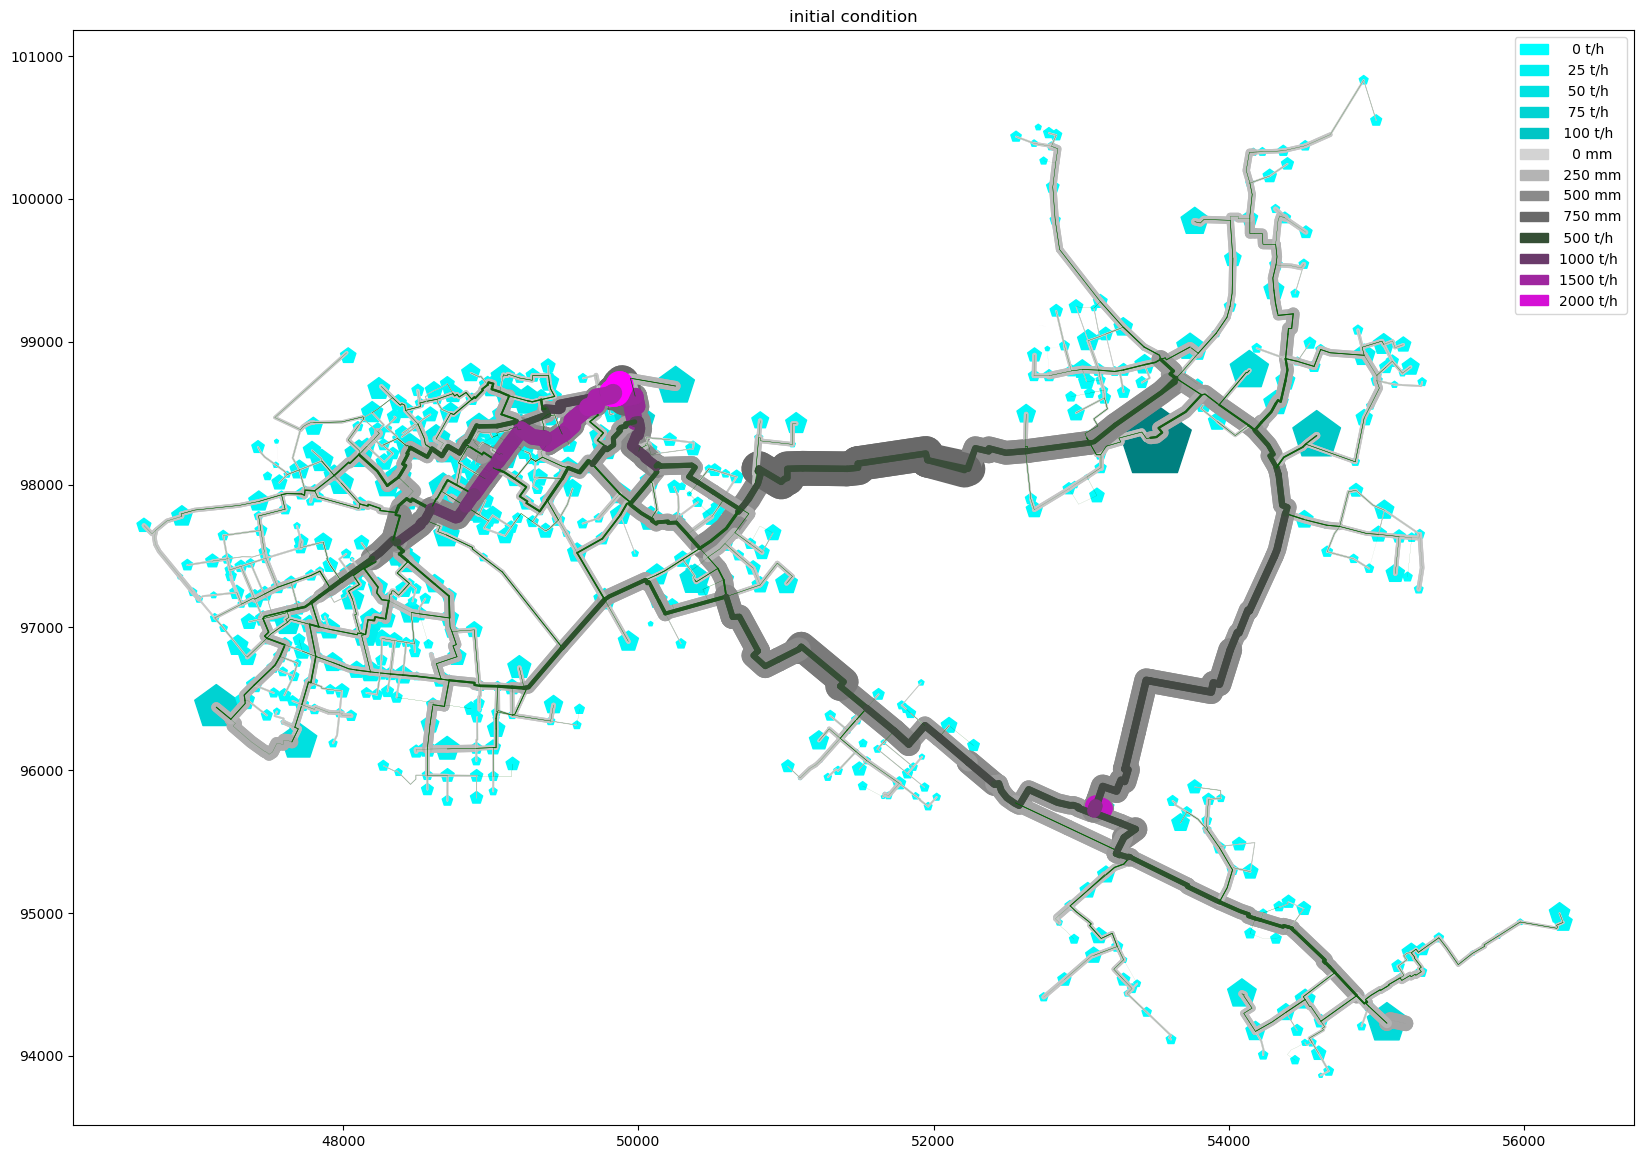

In [25]:
plot_Result_ncd(df_pipes, gdf_district_heating_consumer)